In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# Importação do Datasets

In [36]:
# Importação dos Dados 

arquivo_01 = 'dataset_clean.csv'

raw_data = pd.read_csv(arquivo_01)

In [37]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 24 columns):
Unnamed: 0                808 non-null int64
family                    808 non-null object
steel                     808 non-null object
carbon                    808 non-null int64
hardness                  808 non-null int64
temper_rolling            808 non-null object
condition                 808 non-null object
formability               808 non-null object
strength                  808 non-null int64
non-ageing                808 non-null object
surface-quality           808 non-null object
bf                        808 non-null object
bt                        808 non-null object
bw/me                     808 non-null object
bl                        808 non-null object
cbond                     808 non-null object
ferro                     808 non-null object
blue/bright/varn/clean    808 non-null object
shape                     808 non-null object
thick                    

In [38]:
raw_data.head()

,Unnamed: 0,family,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,bl,cbond,ferro,blue/bright/varn/clean,shape,thick,width,len,bore,recozimento
0,0,?,A,8,0,?,S,?,0,?,...,?,?,?,?,COIL,0.700,610.0,0.0,0,ruim
1,1,?,R,0,0,?,S,2.0,0,?,...,?,?,?,?,SHEET,0.700,1300.0,762.0,0,ruim
2,2,?,A,0,60,T,?,?,0,?,...,?,?,?,?,COIL,2.801,385.1,0.0,0,ideal
3,3,?,A,0,60,T,?,?,0,?,...,Y,Y,?,?,SHEET,0.801,255.0,269.0,0,ideal
4,4,?,A,0,45,?,S,?,0,?,...,?,?,?,?,COIL,1.600,610.0,0.0,0,mediano


# 01 - Analise Exploratória
## 01.1 - Considerações para a Analise Exploratória

Como no passo anterior foi feita toda parte de ETL, algumas analises de tipos de colunas e algumas relações com a feature e o label já foram feitas.
Partiremos do pressuposto de que o arquivo já foi analisado previamente, de forma simples, e iremos explorar outras possibilidade.

## 02 - Impacto do Tamanho da do Produto na Qualidade do Recozimento

In [39]:
df_tamanho_peca = raw_data[['shape', 'thick', 'width', 'len', 'recozimento']]

df_tamanho_peca.head()

,shape,thick,width,len,recozimento
0,COIL,0.700,610.0,0.0,ruim
1,SHEET,0.700,1300.0,762.0,ruim
2,COIL,2.801,385.1,0.0,ideal
3,SHEET,0.801,255.0,269.0,ideal
4,COIL,1.600,610.0,0.0,mediano


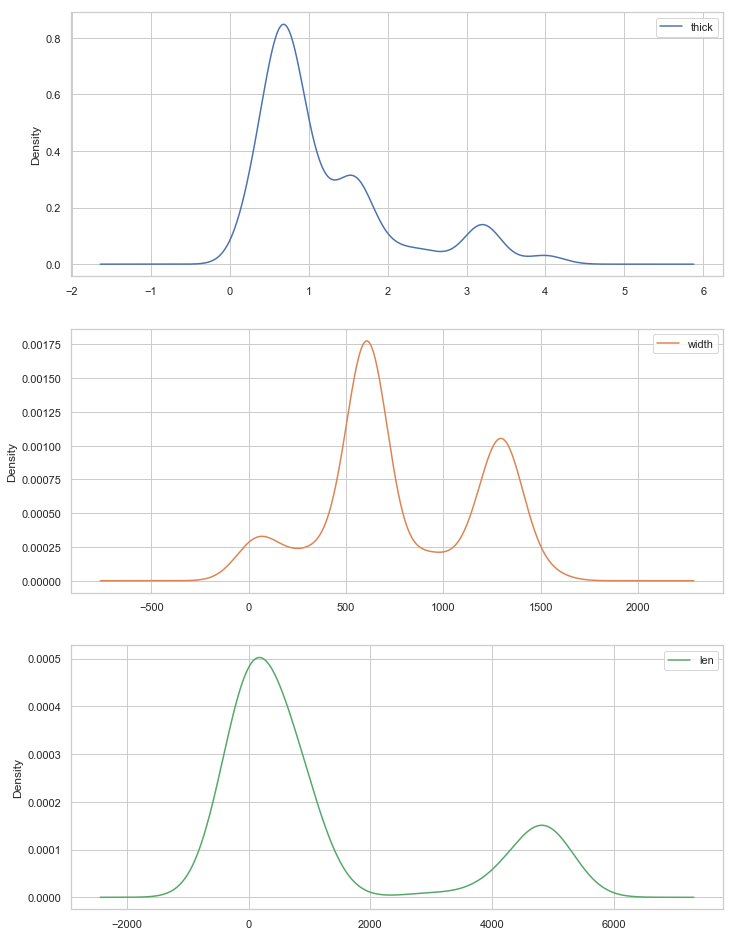

In [40]:
# Density Plots
df_tamanho_peca.plot(kind = 'density',layout = (3,1), subplots = True,  sharex = False, figsize = (11.7, 16.5))
plt.show()

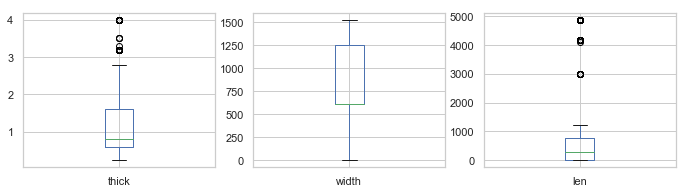

In [41]:
# Box and Whisker Plots
df_tamanho_peca.plot(kind = 'box', subplots = True, layout = (5,3), sharex = False, sharey = False, figsize = (11.7, 16.5))
plt.show()

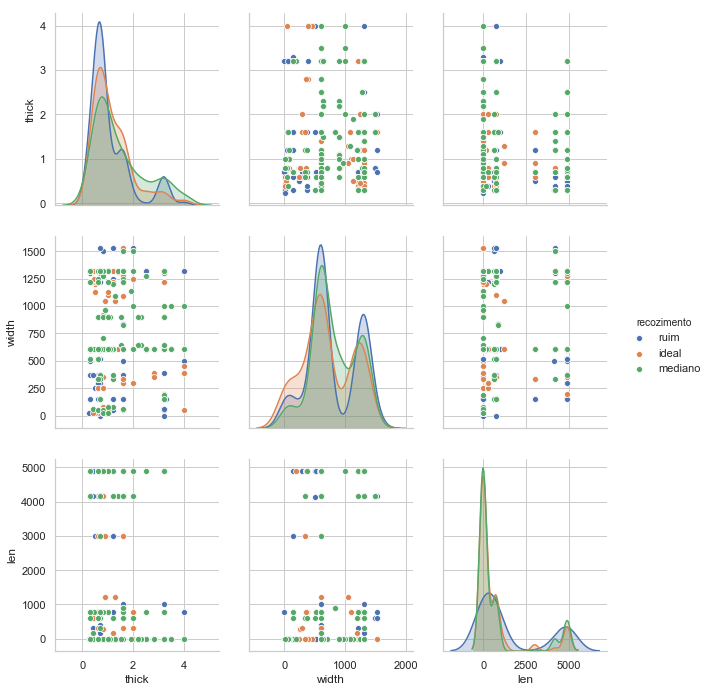

In [42]:
# Pairplot
plot_01 = sns.pairplot(df_tamanho_peca, hue = 'recozimento')
plot_01.fig.set_size_inches(10,10)

Os dados referentes a espessura, largura e comprimento possuem um padrão nos seus valores e os seus valores da label tambem seguem os mesmo padrões. Iremos transformar as features de continua para qualitativa ordenal.

## 2.1 - Feature thick

In [43]:
df_tamanho_peca['thick'].describe()

count    808.000000
mean       1.194947
std        0.878501
min        0.240000
25%        0.601000
50%        0.800000
75%        1.600000
max        4.000000
Name: thick, dtype: float64

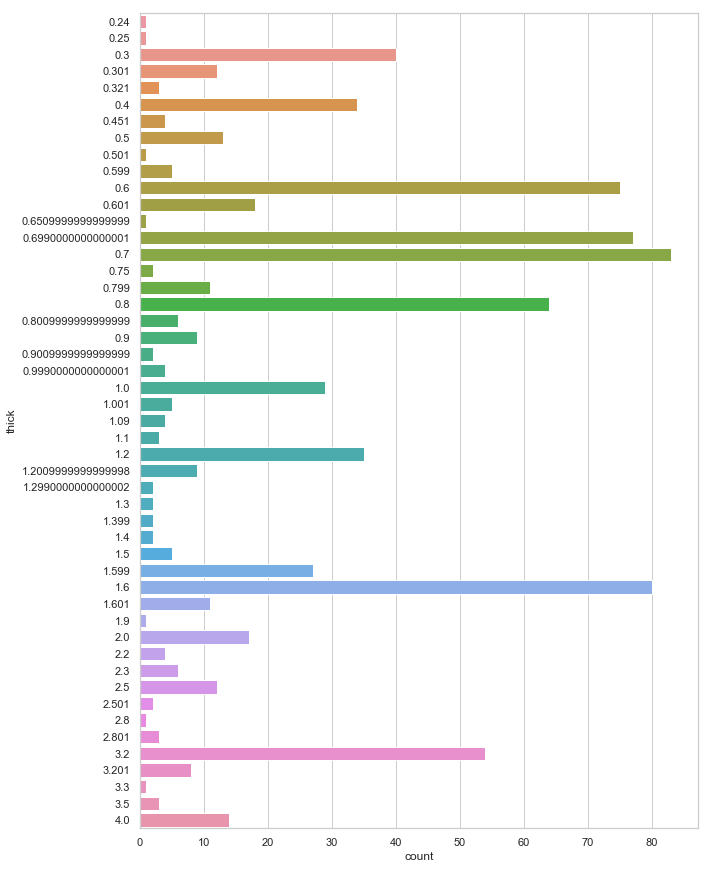

In [44]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 15)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                                                                 
color = sns.color_palette("Set2", 6)

# Contplot
sns.countplot(data = df_tamanho_peca, y = 'thick');

In [45]:
len(df_tamanho_peca['thick'].unique())

49

Será criada uma coluna do tipo qualitativa para a feature thick.
As divisões foram criadas de forma arbitraria, conforme conhecimento de negócio do analista.

 - grupo_thick_01 = valores menores que 0.6
 - grupo_thick_02 = valores entre 0.6 e 1.0
 - grupo_thick_03 = valores entre 1.0 e 1.5
 - grupo_thick_04 = valores entre 1.5 e 1.9
 - grupo_thick_05 = valores entre 1.9 e 2.8
 - grupo_thick_06 = valores maiores que 2.8

In [46]:
# create a new column and use np.select to assign values to it using our lists as arguments
df_tamanho_peca['thick_q'] = np.select(
    (df_tamanho_peca['thick'] <= 0.6,
    (df_tamanho_peca['thick'] > 0.6) & (df_tamanho_peca['thick'] <= 1),
    (df_tamanho_peca['thick'] > 1) & (df_tamanho_peca['thick'] <= 1.5),
    (df_tamanho_peca['thick'] > 1.5) & (df_tamanho_peca['thick'] <= 1.9),
    (df_tamanho_peca['thick'] > 1.9) & (df_tamanho_peca['thick'] <= 2.8),
    (df_tamanho_peca['thick'] > 2.8)),
    ('grupo_thick_01', 'grupo_thick_02', 'grupo_thick_03', 'grupo_thick_04', 'grupo_thick_05', 'grupo_thick_06')
    )

# display updated DataFrame
df_tamanho_peca.head()

,shape,thick,width,len,recozimento,thick_q
0,COIL,0.700,610.0,0.0,ruim,grupo_thick_02
1,SHEET,0.700,1300.0,762.0,ruim,grupo_thick_02
2,COIL,2.801,385.1,0.0,ideal,grupo_thick_06
3,SHEET,0.801,255.0,269.0,ideal,grupo_thick_02
4,COIL,1.600,610.0,0.0,mediano,grupo_thick_04


<Figure size 1440x1152 with 0 Axes>

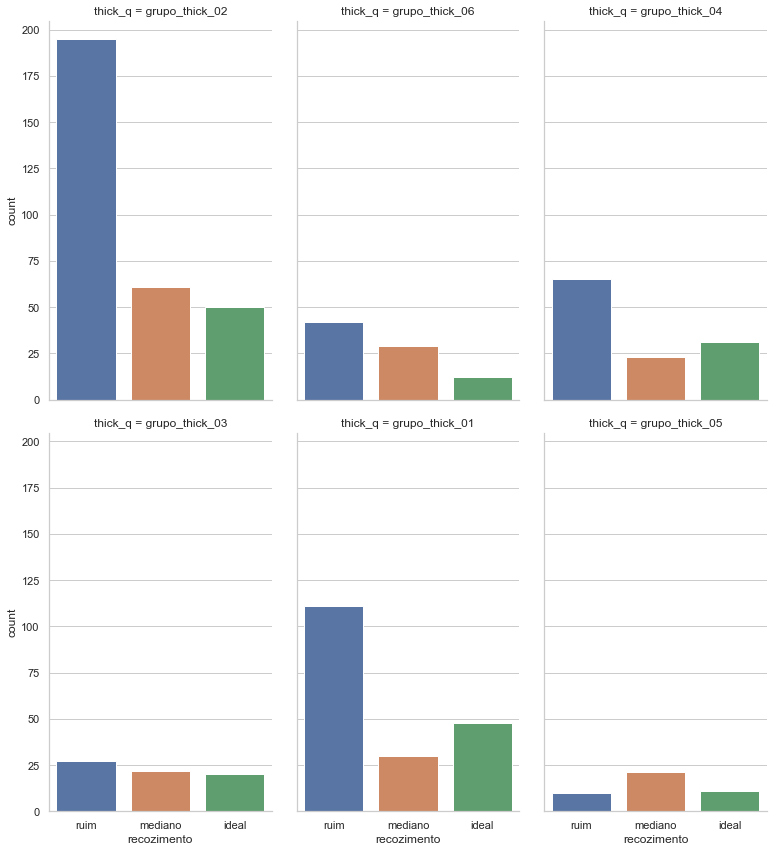

In [47]:
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_tamanho_peca, x = "recozimento",
            kind = "count", 
            col = 'thick_q', col_wrap = 3,
            order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6); 

Os grupos 5, 3 e 6 foram os que melhor obtiveram resultados positivos no recozimento.
A seguir será aumentada a granularidade e analisaremos o desempenho dos grupos de acordo com o shape do material.

<Figure size 1440x1152 with 0 Axes>

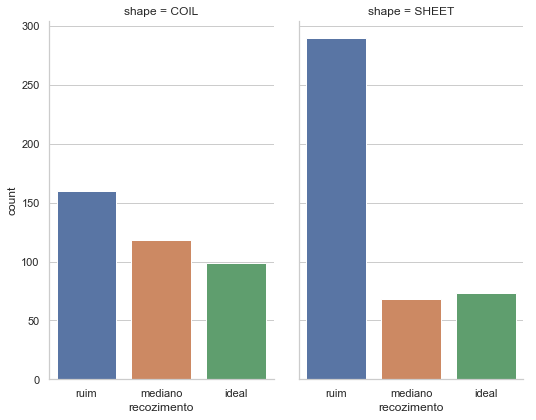

In [48]:
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_tamanho_peca, x = "recozimento",
            kind = "count", 
            col = 'shape', col_wrap = 3,
            order = ('ruim', 'mediano', 'ideal'),
            #hue = 'thick_q',
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6); 

In [49]:
df_tamanho_peca.groupby(['shape', 'recozimento']).size()

shape  recozimento
COIL   ideal           99
       mediano        118
       ruim           160
SHEET  ideal           73
       mediano         68
       ruim           290
dtype: int64

<Figure size 1440x1152 with 0 Axes>

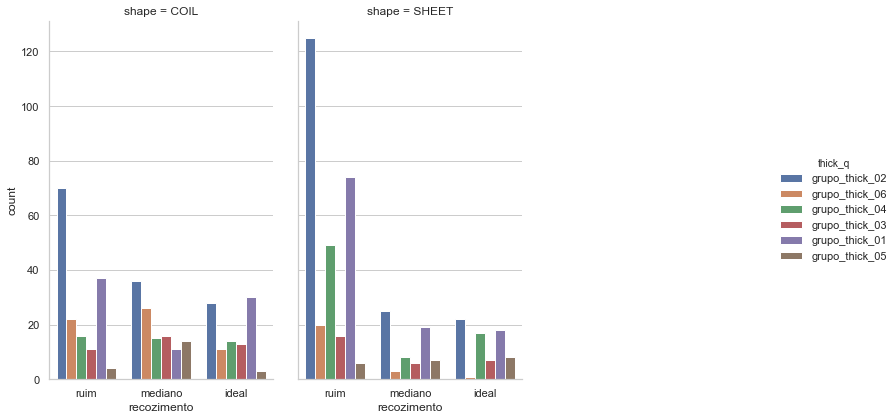

In [50]:
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_tamanho_peca, x = "recozimento",
            kind = "count", 
            col = 'shape', col_wrap = 3,
            order = ('ruim', 'mediano', 'ideal'),
            hue = 'thick_q',
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6); 

## 2.2 - Feature width

In [51]:
df_tamanho_peca['width'].describe()

count     808.000000
mean      781.849505
std       404.277628
min         0.000000
25%       609.900000
50%       610.000000
75%      1250.000000
max      1525.000000
Name: width, dtype: float64

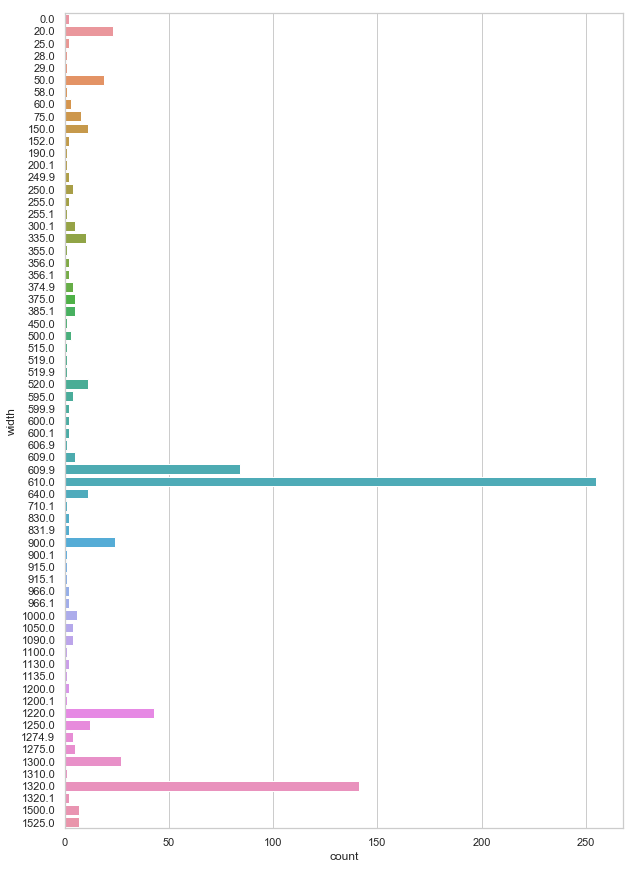

In [52]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 15)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                                                                 
color = sns.color_palette("Set2", 6)

# Contplot
sns.countplot(data = df_tamanho_peca, y = 'width');

In [53]:
len(df_tamanho_peca['width'].unique())

67

Será criada uma coluna do tipo qualitativa para a feature width.
As divisões foram criadas de forma arbitraria, conforme conhecimento de negócio do analista.

 - grupo_width_01 = valores menores que 600
 - grupo_width_02 = valores entre 600 e 1000
 - grupo_width_03 = valores maiores que 1000

In [54]:
# create a new column and use np.select to assign values to it using our lists as arguments
df_tamanho_peca['width_q'] = np.select(
    (df_tamanho_peca['width'] <= 600,
    (df_tamanho_peca['width'] > 600) & (df_tamanho_peca['width'] <= 1000),
    (df_tamanho_peca['width'] > 1000)),
    ('grupo_width_01', 'grupo_width_02', 'grupo_width_03')
    )

# display updated DataFrame
df_tamanho_peca.head()

,shape,thick,width,len,recozimento,thick_q,width_q
0,COIL,0.700,610.0,0.0,ruim,grupo_thick_02,grupo_width_02
1,SHEET,0.700,1300.0,762.0,ruim,grupo_thick_02,grupo_width_03
2,COIL,2.801,385.1,0.0,ideal,grupo_thick_06,grupo_width_01
3,SHEET,0.801,255.0,269.0,ideal,grupo_thick_02,grupo_width_01
4,COIL,1.600,610.0,0.0,mediano,grupo_thick_04,grupo_width_02


<Figure size 1440x1152 with 0 Axes>

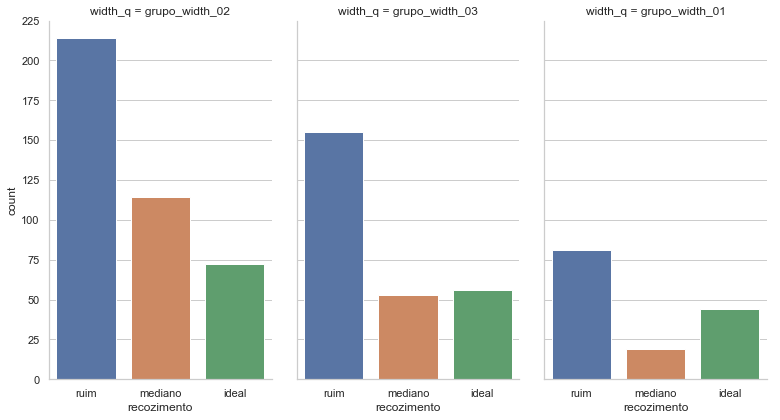

In [55]:
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_tamanho_peca, x = "recozimento",
            kind = "count", 
            col = 'width_q', col_wrap = 3,
            order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6); 

<Figure size 1440x1152 with 0 Axes>

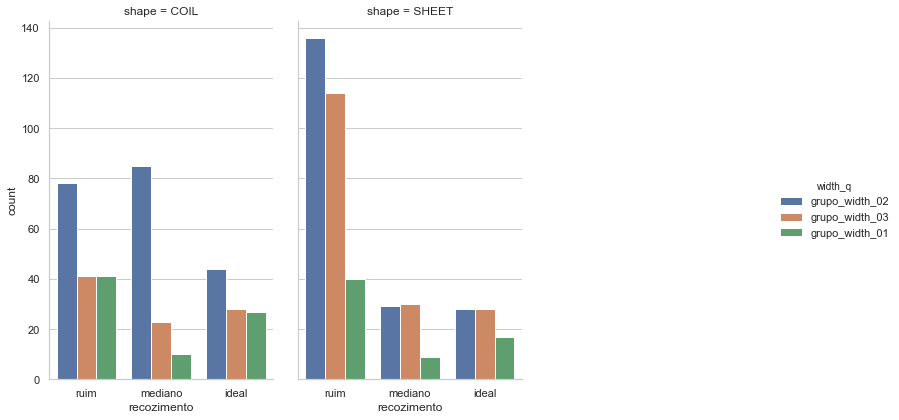

In [56]:
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_tamanho_peca, x = "recozimento",
            kind = "count", 
            col = 'shape', col_wrap = 3,
            order = ('ruim', 'mediano', 'ideal'),
            hue = 'width_q',
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6); 

## 2.2 - Feature len

In [57]:
df_tamanho_peca['len'].describe()

count     808.000000
mean     1232.308168
std      1854.913346
min         0.000000
25%         0.000000
50%       301.000000
75%       762.000000
max      4880.000000
Name: len, dtype: float64

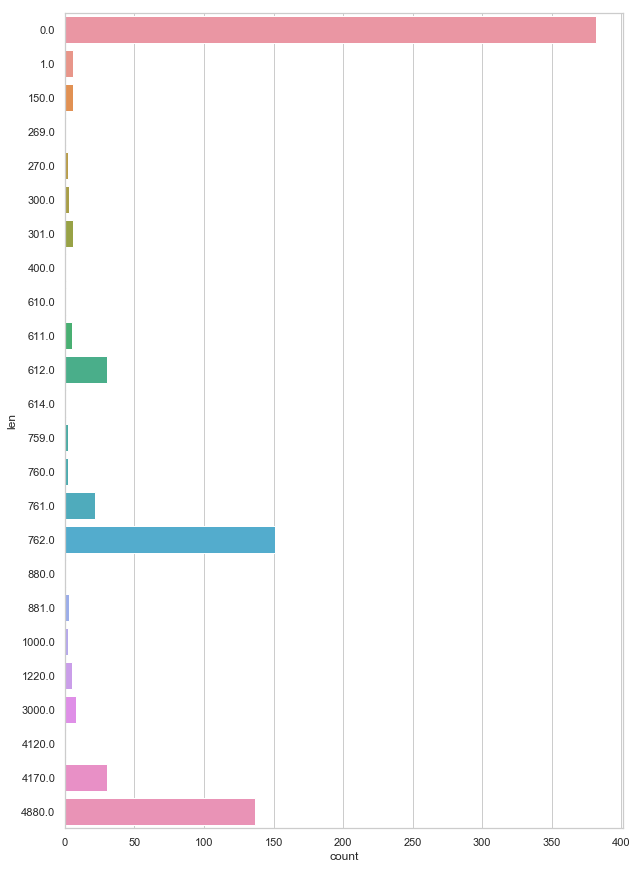

In [58]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 15)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                                                                 
color = sns.color_palette("Set2", 6)

# Contplot
sns.countplot(data = df_tamanho_peca, y = 'len');

In [59]:
len(df_tamanho_peca['len'].unique())

24

Será criada uma coluna do tipo qualitativa para a feature len.
As divisões foram criadas de forma arbitraria, conforme conhecimento de negócio do analista.

 - grupo_width_01 = valores menores que 400
 - grupo_width_02 = valores entre 400 e 880
 - grupo_width_03 = valores maiores que 880

In [60]:
# create a new column and use np.select to assign values to it using our lists as arguments
df_tamanho_peca['len_q'] = np.select(
    (df_tamanho_peca['len'] <= 400,
    (df_tamanho_peca['len'] > 400) & (df_tamanho_peca['len'] <= 880),
    (df_tamanho_peca['len'] > 880)),
    ('grupo_len_01', 'grupo_len_02', 'grupo_len_03')
    )

# display updated DataFrame
df_tamanho_peca.head()

,shape,thick,width,len,recozimento,thick_q,width_q,len_q
0,COIL,0.700,610.0,0.0,ruim,grupo_thick_02,grupo_width_02,grupo_len_01
1,SHEET,0.700,1300.0,762.0,ruim,grupo_thick_02,grupo_width_03,grupo_len_02
2,COIL,2.801,385.1,0.0,ideal,grupo_thick_06,grupo_width_01,grupo_len_01
3,SHEET,0.801,255.0,269.0,ideal,grupo_thick_02,grupo_width_01,grupo_len_01
4,COIL,1.600,610.0,0.0,mediano,grupo_thick_04,grupo_width_02,grupo_len_01


<Figure size 1440x1152 with 0 Axes>

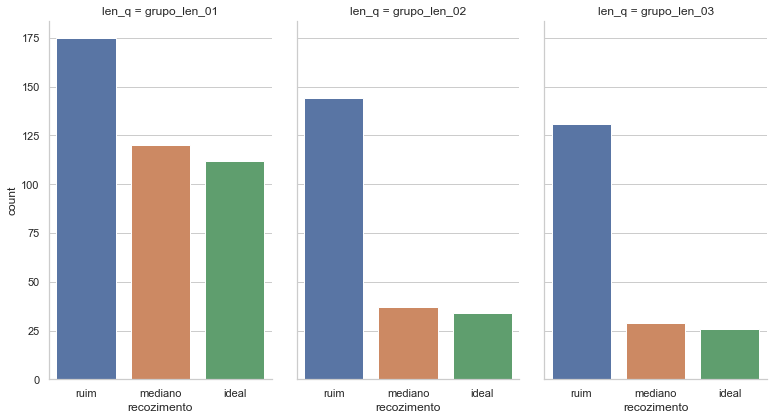

In [61]:
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_tamanho_peca, x = "recozimento",
            kind = "count", 
            col = 'len_q', col_wrap = 3,
            order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6); 

<Figure size 1440x1152 with 0 Axes>

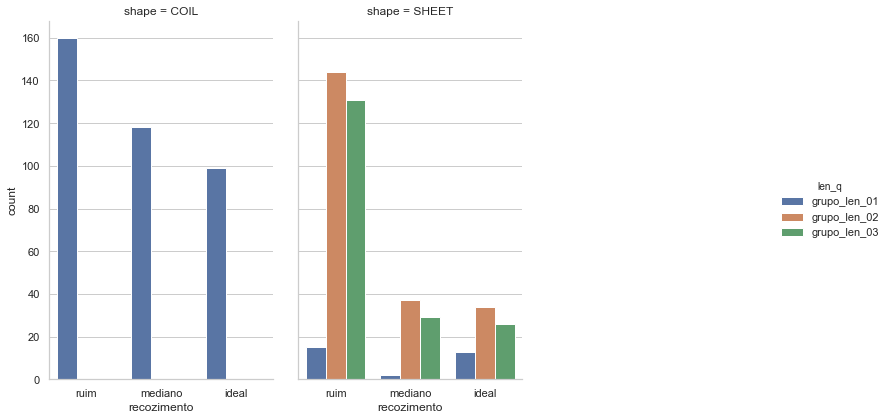

In [62]:
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_tamanho_peca, x = "recozimento",
            kind = "count", 
            col = 'shape', col_wrap = 3,
            order = ('ruim', 'mediano', 'ideal'),
            hue = 'len_q',
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6); 

A feature len não possui valores cadastrados quando o material possui o tipo de shape = COIL

## 03 - Fazendo Merge e Salvando Dataset Para Analise

In [63]:
df_arquivo_03 = pd.merge(left = raw_data,
                      right = df_tamanho_peca,
                      how = 'outer')

In [64]:
df_arquivo_03.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 1953
Data columns (total 27 columns):
Unnamed: 0                1954 non-null int64
family                    1954 non-null object
steel                     1954 non-null object
carbon                    1954 non-null int64
hardness                  1954 non-null int64
temper_rolling            1954 non-null object
condition                 1954 non-null object
formability               1954 non-null object
strength                  1954 non-null int64
non-ageing                1954 non-null object
surface-quality           1954 non-null object
bf                        1954 non-null object
bt                        1954 non-null object
bw/me                     1954 non-null object
bl                        1954 non-null object
cbond                     1954 non-null object
ferro                     1954 non-null object
blue/bright/varn/clean    1954 non-null object
shape                     1954 non-null object
thic

In [65]:
df_arquivo_03.head()

,Unnamed: 0,family,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,blue/bright/varn/clean,shape,thick,width,len,bore,recozimento,thick_q,width_q,len_q
0,0,?,A,8,0,?,S,?,0,?,...,?,COIL,0.7,610.0,0.0,0,ruim,grupo_thick_02,grupo_width_02,grupo_len_01
1,0,?,A,8,0,?,S,?,0,?,...,?,COIL,0.7,610.0,0.0,0,ruim,grupo_thick_02,grupo_width_02,grupo_len_01
2,0,?,A,8,0,?,S,?,0,?,...,?,COIL,0.7,610.0,0.0,0,ruim,grupo_thick_02,grupo_width_02,grupo_len_01
3,0,?,A,8,0,?,S,?,0,?,...,?,COIL,0.7,610.0,0.0,0,ruim,grupo_thick_02,grupo_width_02,grupo_len_01
4,0,?,A,8,0,?,S,?,0,?,...,?,COIL,0.7,610.0,0.0,0,ruim,grupo_thick_02,grupo_width_02,grupo_len_01


In [66]:
df_arquivo_03 = df_arquivo_03.drop(['Unnamed: 0'], axis = 1)

In [67]:
df_arquivo_03.to_csv('dataset_model.csv')